In [35]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [28]:
data= pd.read_csv("data/penguins.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 342 entries, 0 to 341
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   342 non-null    int64  
 1   Species              342 non-null    object 
 2   Island               342 non-null    object 
 3   Clutch Completion    342 non-null    object 
 4   Culmen Length (mm)   342 non-null    float64
 5   Culmen Depth (mm)    342 non-null    float64
 6   Flipper Length (mm)  342 non-null    int64  
 7   Body Mass (g)        342 non-null    int64  
 8   Sex                  334 non-null    object 
 9   Delta 15 N (o/oo)    330 non-null    float64
 10  Delta 13 C (o/oo)    331 non-null    float64
dtypes: float64(4), int64(3), object(4)
memory usage: 29.5+ KB


## EDA

### 1. 결측치 확인

In [29]:
data[data.isna().sum(axis=1) > 0]

,id,Species,Island,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo)
0,0,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,39.1,18.7,181,3750,MALE,NaN,NaN
7,8,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,34.1,18.1,193,3475,NaN,NaN,NaN
8,9,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,42.0,20.2,190,4250,NaN,9.13362,-25.09368
9,10,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,37.8,17.1,186,3300,NaN,8.63243,-25.21315
10,11,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,37.8,17.3,180,3700,NaN,NaN,NaN
11,12,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,41.1,17.6,182,3200,FEMALE,NaN,NaN
12,13,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,38.6,21.2,191,3800,MALE,NaN,NaN
14,15,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,36.6,17.8,185,3700,FEMALE,NaN,NaN
38,39,Adelie Penguin (Pygoscelis adeliae),Dream,No,39.8,19.1,184,4650,MALE,NaN,NaN
40,41,Adelie Penguin (Pygoscelis adeliae),Dream,Yes,40.8,18.4,195,3900,MALE,NaN,NaN


In [30]:
penguin_num=data[['Culmen Length (mm)','Culmen Depth (mm)','Flipper Length (mm)','Delta 15 N (o/oo)','Delta 13 C (o/oo)','Body Mass (g)']]
penguin_num

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Delta 15 N (o/oo),Delta 13 C (o/oo),Body Mass (g)
0,39.1,18.7,181,NaN,NaN,3750
1,39.5,17.4,186,8.94956,-24.69454,3800
2,40.3,18.0,195,8.36821,-25.33302,3250
3,36.7,19.3,193,8.76651,-25.32426,3450
4,39.3,20.6,190,8.66496,-25.29805,3650
...,...,...,...,...,...,...
337,47.2,13.7,214,7.99184,-26.20538,4925
338,46.8,14.3,215,8.41151,-26.13832,4850
339,50.4,15.7,222,8.30166,-26.04117,5750
340,45.2,14.8,212,8.24246,-26.11969,5200


In [37]:
#수치형 변수들의 상관관계까 음이든, 양이든 있다고 볼수 있고 모두 사용해볼만한 변수라고 판단된다.
penguin_num.corr()

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Delta 15 N (o/oo),Delta 13 C (o/oo),Body Mass (g)
Culmen Length (mm),1.000000,-0.235053,0.656181,-0.059759,0.189025,0.595110
Culmen Depth (mm),-0.235053,1.000000,-0.583851,0.605874,0.429933,-0.471916
Flipper Length (mm),0.656181,-0.583851,1.000000,-0.507787,-0.376223,0.871202
Delta 15 N (o/oo),-0.059759,0.605874,-0.507787,1.000000,0.570615,-0.537888
Delta 13 C (o/oo),0.189025,0.429933,-0.376223,0.570615,1.000000,-0.374638
Body Mass (g),0.595110,-0.471916,0.871202,-0.537888,-0.374638,1.000000


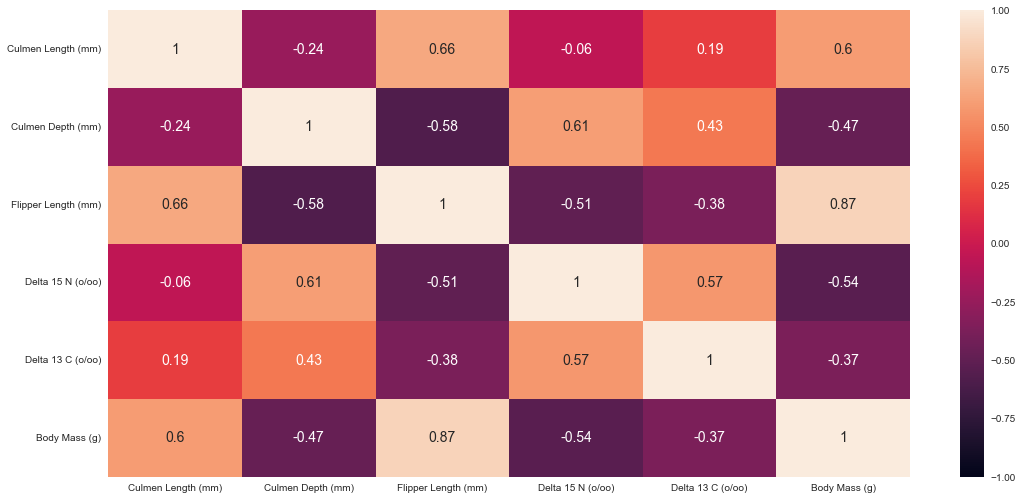

In [53]:
plt.figure(figsize=(16,8))
sns.heatmap(penguin_num.corr(),annot=True,vmin=-1, vmax=1);

### 시각화(Visualization)

In [41]:
target = data['Body Mass (g)']
object_columns = ['Species','Island','Clutch Completion','Sex']
numerical_columns= ['Culmen Depth (mm)','Culmen Length (mm)','Flipper Length (mm)','Delta 15 N (o/oo)','Delta 13 C (o/oo)']

Species
Adelie Penguin (Pygoscelis adeliae)          151
Gentoo penguin (Pygoscelis papua)            123
Chinstrap penguin (Pygoscelis antarctica)     68
Name: Species, dtype: int64


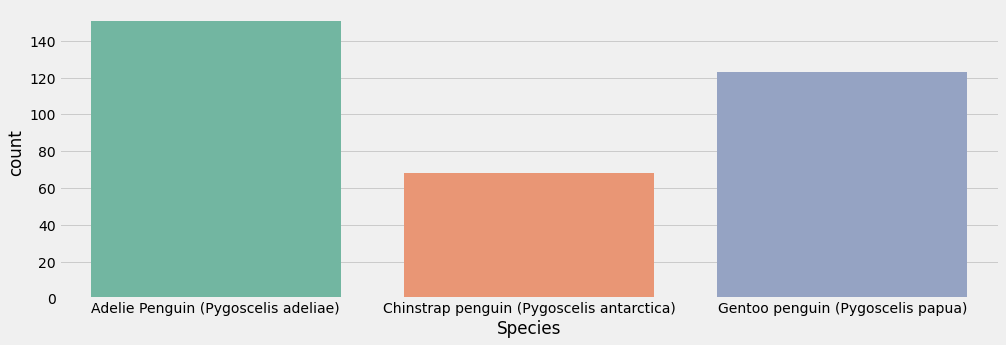

Island
Biscoe       167
Dream        124
Torgersen     51
Name: Island, dtype: int64


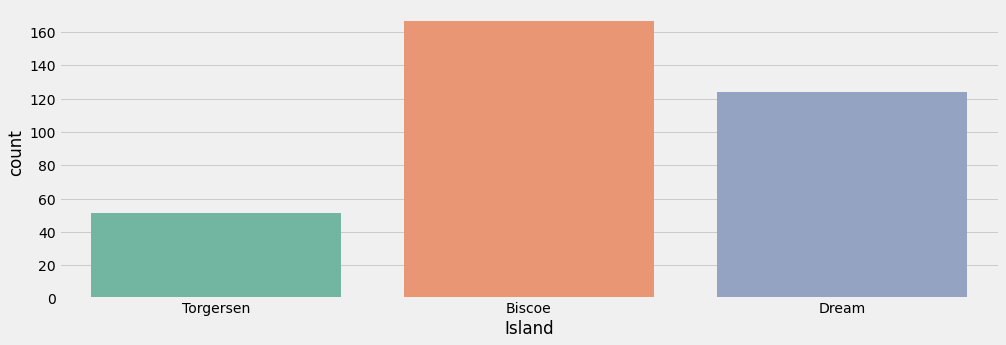

Clutch Completion
Yes    307
No      35
Name: Clutch Completion, dtype: int64


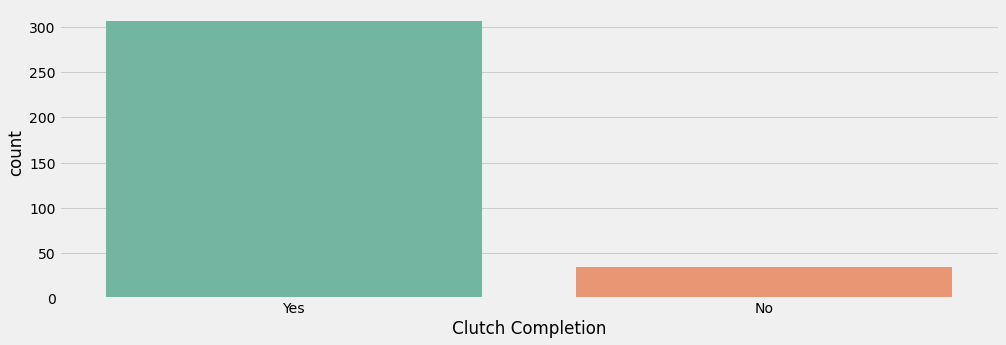

Sex
MALE      168
FEMALE    165
.           1
Name: Sex, dtype: int64


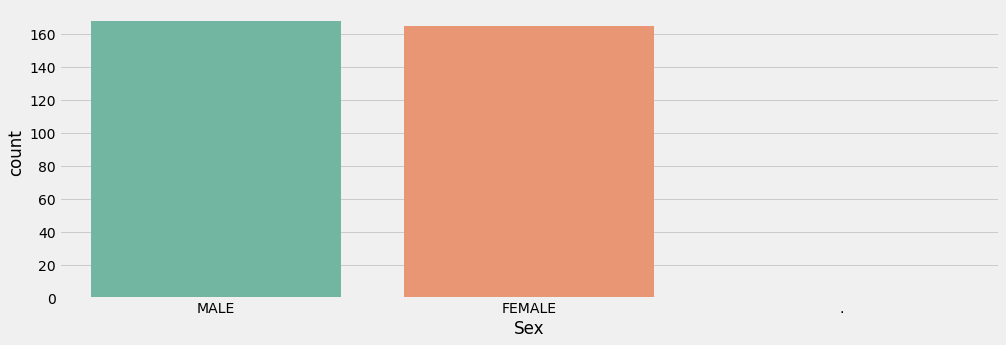

In [48]:
for _ in object_columns:
    print(_)
    print(data[_].value_counts())
    plt.figure(figsize=(15,5))
    sns.countplot(x=data[_],palette='Set2')
    plt.show()

Culmen Depth (mm)


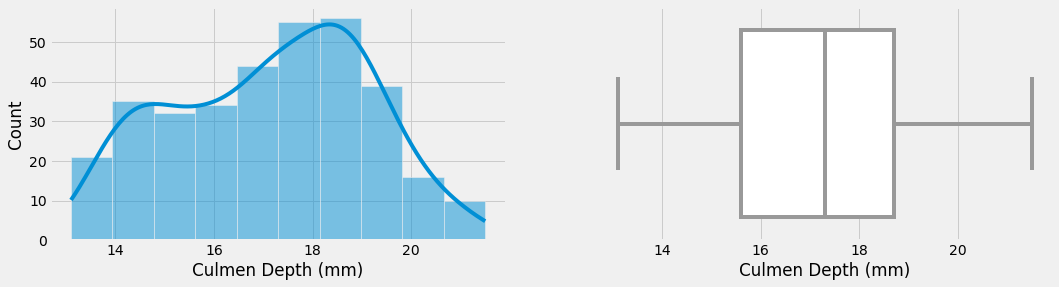

<Figure size 1080x360 with 0 Axes>

Culmen Length (mm)


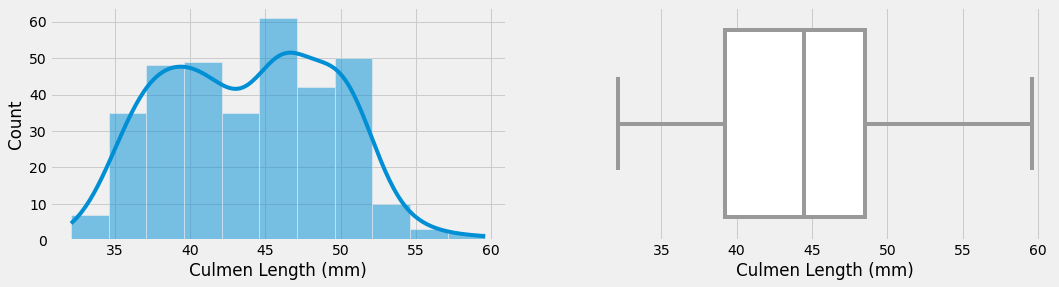

<Figure size 1080x360 with 0 Axes>

Flipper Length (mm)


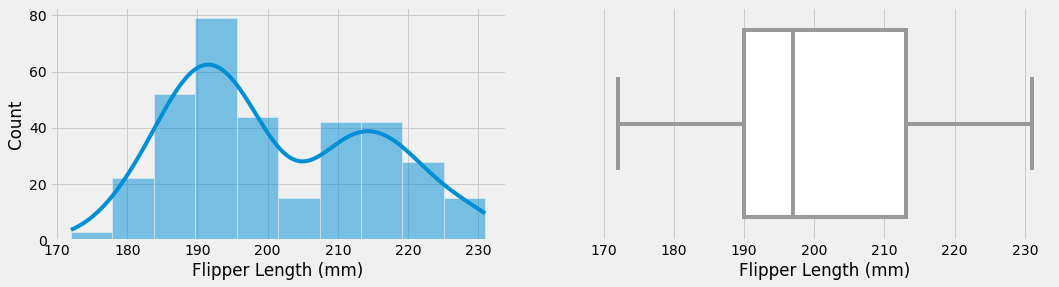

<Figure size 1080x360 with 0 Axes>

Delta 15 N (o/oo)


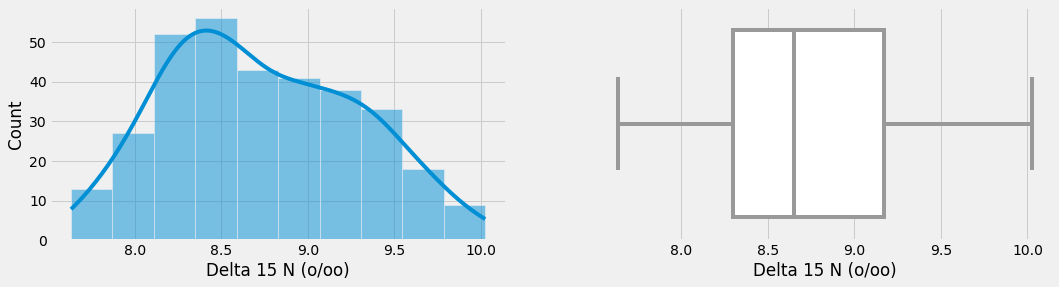

<Figure size 1080x360 with 0 Axes>

Delta 13 C (o/oo)


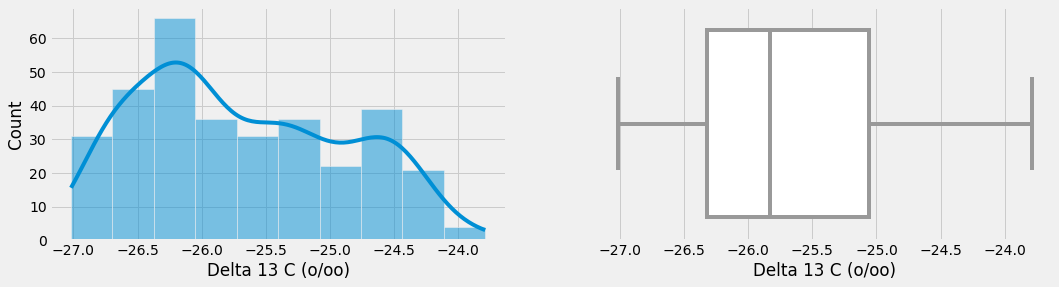

<Figure size 1080x360 with 0 Axes>

In [46]:
plt.style.use('fivethirtyeight')
for _ in numerical_columns:
    print(_)
    f,ax=plt.subplots(1,2,figsize=(16,4))
    plt.figure(figsize=(15,5))
    sns.histplot(x=data[_],ax=ax[0],kde=True)
    sns.boxplot(x=data[_],ax=ax[1],color='white')
    plt.show()

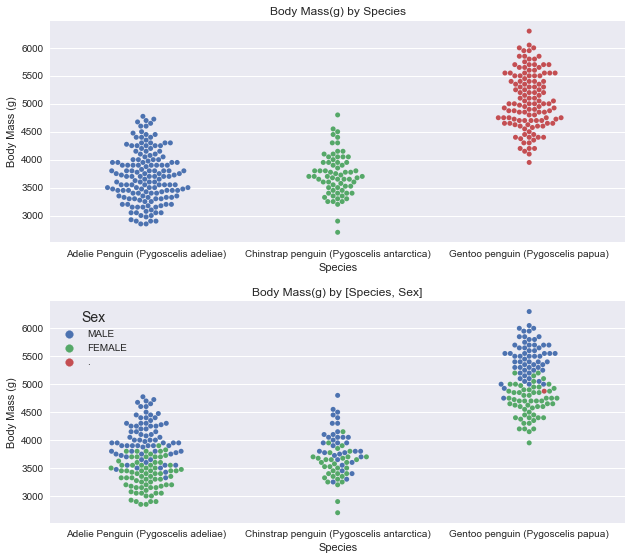

In [55]:
#Show 'Body Mass (g)' by Species. + 'Sex'
f,ax= plt.subplots(2,1,figsize=(9,8))
sns.swarmplot(data=data, x='Species',y='Body Mass (g)',ax=ax[0]);
ax[0].set_title("Body Mass(g) by Species")
sns.swarmplot(data=data, x='Species',y='Body Mass (g)',hue='Sex',ax=ax[1]);
ax[1].set_title("Body Mass(g) by [Species, Sex]")

plt.tight_layout() #Show clearly.

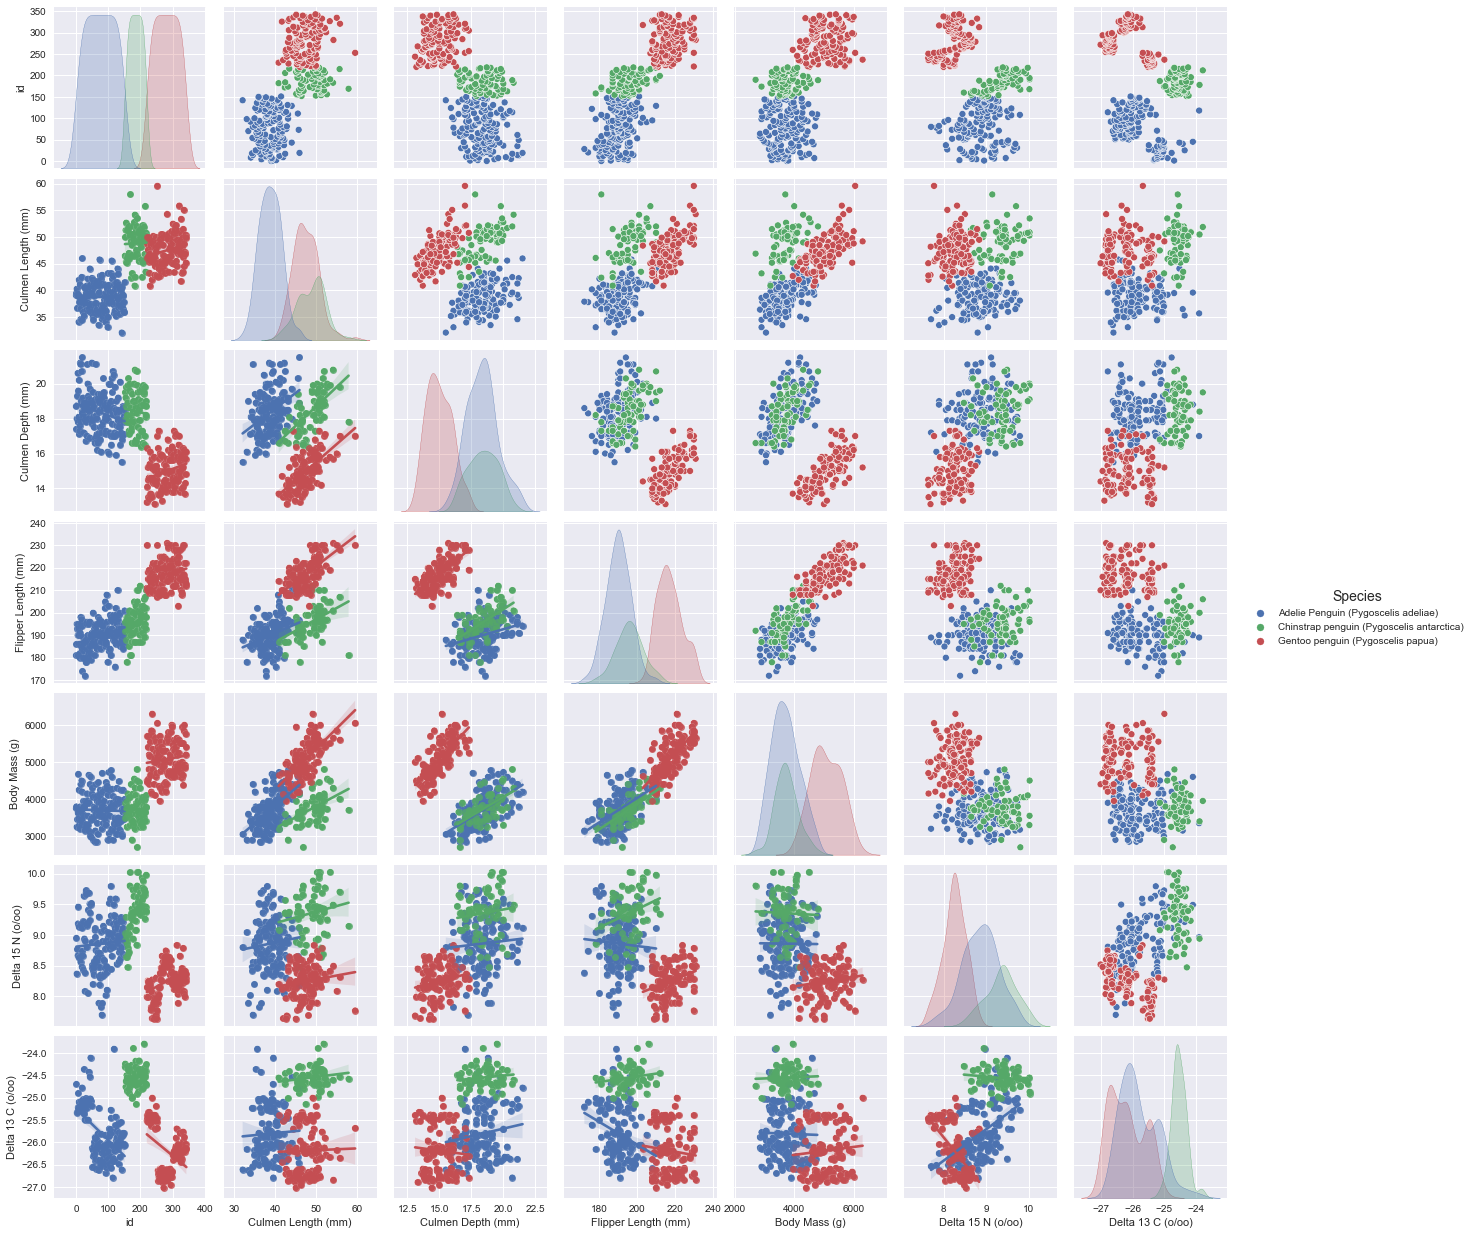

In [52]:
plt.style.use('seaborn')
g= sns.pairplot(data,hue='Species')
g.map_lower(sns.regplot);